In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!nvidia-smi

Sun Nov 10 15:37:54 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   51C    P8             10W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /kaggle/working


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YAWfjtM3pGcu8QUxvbkl")
project = rf.workspace("night-op82o").project("tomato-ttmht")
version = project.version(2)
dataset = version.download("yolov11")
                

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 2.3 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Tomato-2 in yolov11:: 100%|██████████| 7124/7124 [00:01<00:00, 5788.72it/s]


In [4]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 15.8 MB/s eta 0:00:00a 0:00:01


In [5]:
from ultralytics import YOLO

# Tải mô hình YOLOv10 pre-trained
model = YOLO('yolo11n.pt')

# Huấn luyện mô hình
results = model.train(data="/kaggle/working/Tomato-2/data.yaml", epochs=100, imgsz=640, batch=64, device='0,1', patience = 10 )

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 63.9MB/s]


Ultralytics 8.3.28 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
                                                 CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/working/Tomato-2/data.yaml, epochs=100, time=None, patience=10, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=0,1, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, 

100%|██████████| 755k/755k [00:00<00:00, 13.7MB/s]
2024-11-10 15:38:48,898	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-11-10 15:38:49,922	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /kaggle/working/Tomato-2/train/labels... 2845 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2845/2845 [00:02<00:00, 1088.28it/s]


train: New cache created: /kaggle/working/Tomato-2/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 9, len(boxes) = 14013. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/Tomato-2/valid/labels...:   0%|          | 0/356 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/Tomato-2/valid/labels... 356 images, 0 backgrounds, 0 corrupt: 100%|██████████| 356/356 [00:00<00:00, 1162.77it/s]


val: New cache created: /kaggle/working/Tomato-2/valid/labels.cache


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      5.32G      1.162      3.464      1.156        124        640: 100%|██████████| 45/45 [00:26<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.54it/s]


                   all        356       1988     0.0151      0.791      0.383      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      5.18G      1.095      1.747      1.095        108        640: 100%|██████████| 45/45 [00:24<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]


                   all        356       1988      0.695      0.464      0.626      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      6.81G      1.005      1.399      1.075        107        640: 100%|██████████| 45/45 [00:23<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.96it/s]


                   all        356       1988      0.603      0.676      0.644      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.91G      1.026      1.341      1.093         95        640: 100%|██████████| 45/45 [00:23<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.88it/s]


                   all        356       1988      0.691      0.665      0.699      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      5.25G     0.9684      1.202      1.077         91        640: 100%|██████████| 45/45 [00:23<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.03it/s]


                   all        356       1988      0.723      0.684      0.709      0.533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      5.43G     0.9745      1.157      1.084         75        640: 100%|██████████| 45/45 [00:24<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.11it/s]


                   all        356       1988      0.707      0.686       0.74      0.552

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       5.9G     0.9501       1.08      1.065         91        640: 100%|██████████| 45/45 [00:23<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]


                   all        356       1988      0.706      0.686      0.733      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      5.64G       0.92      1.036      1.052         81        640: 100%|██████████| 45/45 [00:23<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.34it/s]


                   all        356       1988      0.666      0.706      0.737      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.61G     0.9288      1.018      1.064        152        640: 100%|██████████| 45/45 [00:23<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]


                   all        356       1988      0.749      0.724      0.773      0.587

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.39G     0.9019     0.9777       1.05         93        640: 100%|██████████| 45/45 [00:23<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.34it/s]


                   all        356       1988      0.731      0.725      0.766      0.582

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.07G     0.9192     0.9513       1.06        140        640: 100%|██████████| 45/45 [00:23<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]


                   all        356       1988      0.744      0.733      0.769      0.593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      6.68G     0.8871     0.9302      1.052        118        640: 100%|██████████| 45/45 [00:23<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.22it/s]


                   all        356       1988      0.752      0.731      0.777      0.593


  0%|          | 0/45 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.57G     0.9034     0.9217      1.054        160        640: 100%|██████████| 45/45 [00:23<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.15it/s]


                   all        356       1988      0.756      0.742      0.789      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.35G     0.8534     0.8837      1.038        110        640: 100%|██████████| 45/45 [00:23<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.18it/s]


                   all        356       1988      0.756      0.757      0.801      0.617

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.46G     0.8671     0.8506      1.038         96        640: 100%|██████████| 45/45 [00:23<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]


                   all        356       1988      0.759      0.733      0.796      0.613

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      5.89G     0.8648     0.8712      1.033        114        640: 100%|██████████| 45/45 [00:23<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.11it/s]


                   all        356       1988      0.748      0.756      0.792      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.37G     0.8592     0.8632      1.035         99        640: 100%|██████████| 45/45 [00:23<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.38it/s]


                   all        356       1988      0.741      0.768      0.802      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       5.3G     0.8507     0.8433       1.03        118        640: 100%|██████████| 45/45 [00:23<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.30it/s]


                   all        356       1988      0.738      0.778      0.806      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.02G     0.8643     0.8486      1.035        120        640: 100%|██████████| 45/45 [00:23<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.28it/s]


                   all        356       1988      0.771      0.756      0.815      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       6.6G     0.8494     0.8413      1.026         62        640: 100%|██████████| 45/45 [00:23<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.37it/s]


                   all        356       1988      0.746      0.724       0.79       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.12G     0.8514     0.8331      1.025        186        640: 100%|██████████| 45/45 [00:23<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.43it/s]


                   all        356       1988      0.789      0.762      0.822      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      5.24G     0.8319     0.8123      1.023         79        640: 100%|██████████| 45/45 [00:23<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.45it/s]


                   all        356       1988      0.761      0.771      0.814      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.76G     0.8401     0.8131      1.035         91        640: 100%|██████████| 45/45 [00:23<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.43it/s]


                   all        356       1988      0.756      0.758      0.805      0.626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       5.3G     0.8321       0.81      1.035         69        640: 100%|██████████| 45/45 [00:23<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.34it/s]


                   all        356       1988      0.765      0.767      0.816      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      6.63G     0.8266      0.788      1.019        131        640: 100%|██████████| 45/45 [00:23<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.20it/s]


                   all        356       1988      0.785      0.718      0.808      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       5.6G        0.8     0.7757       1.02         79        640: 100%|██████████| 45/45 [00:23<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.38it/s]


                   all        356       1988      0.788      0.773      0.824      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.75G      0.824     0.7904      1.023         96        640: 100%|██████████| 45/45 [00:23<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]


                   all        356       1988      0.763      0.796      0.831      0.658

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       5.1G     0.8118     0.7895      1.022        116        640: 100%|██████████| 45/45 [00:22<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.43it/s]


                   all        356       1988      0.797      0.757      0.828      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.18G     0.8237     0.7768      1.023        123        640: 100%|██████████| 45/45 [00:23<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.17it/s]


                   all        356       1988      0.763      0.783      0.826      0.655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.16G     0.8063     0.7656      1.004         98        640: 100%|██████████| 45/45 [00:23<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.29it/s]


                   all        356       1988      0.759      0.775      0.821      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.79G     0.8157     0.7685       1.01         96        640: 100%|██████████| 45/45 [00:22<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.34it/s]


                   all        356       1988      0.807      0.762      0.827      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.51G     0.8147     0.7592      1.016         95        640: 100%|██████████| 45/45 [00:22<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.42it/s]


                   all        356       1988      0.748      0.765      0.818      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.46G     0.8043     0.7591      1.015        103        640: 100%|██████████| 45/45 [00:22<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.27it/s]


                   all        356       1988      0.778      0.776      0.839      0.655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.32G     0.7941      0.733     0.9965        134        640: 100%|██████████| 45/45 [00:22<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.30it/s]


                   all        356       1988      0.762      0.795      0.835      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.82G     0.8001     0.7478      1.011        146        640: 100%|██████████| 45/45 [00:23<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.36it/s]


                   all        356       1988      0.769      0.793      0.834      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.15G     0.7873     0.7325      1.004        105        640: 100%|██████████| 45/45 [00:23<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.29it/s]


                   all        356       1988      0.813      0.763       0.83      0.657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.44G     0.7878     0.7255      1.001         74        640: 100%|██████████| 45/45 [00:23<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.33it/s]


                   all        356       1988      0.801      0.782      0.845      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.48G     0.7881     0.7164      1.001        127        640: 100%|██████████| 45/45 [00:22<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]


                   all        356       1988      0.771      0.785      0.822      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.96G      0.806     0.7468      1.014        101        640: 100%|██████████| 45/45 [00:22<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]


                   all        356       1988      0.814      0.771      0.845      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.31G     0.7783     0.7154     0.9963         78        640: 100%|██████████| 45/45 [00:22<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.20it/s]


                   all        356       1988      0.794       0.77      0.832      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.35G     0.7907     0.7098      0.989        103        640: 100%|██████████| 45/45 [00:23<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.37it/s]


                   all        356       1988      0.818      0.762      0.839      0.669

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.16G     0.7638     0.6985      0.995        131        640: 100%|██████████| 45/45 [00:23<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.36it/s]


                   all        356       1988      0.807      0.761      0.832      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.77G     0.7678     0.6978     0.9952         68        640: 100%|██████████| 45/45 [00:22<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.19it/s]


                   all        356       1988       0.79       0.77      0.825      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      5.24G     0.7545     0.6914     0.9889        114        640: 100%|██████████| 45/45 [00:22<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.45it/s]


                   all        356       1988      0.789      0.779      0.839      0.674

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.82G     0.7731     0.6859     0.9918        137        640: 100%|██████████| 45/45 [00:22<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.25it/s]


                   all        356       1988      0.787      0.782      0.835      0.671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      5.45G     0.7677     0.6985     0.9948        118        640: 100%|██████████| 45/45 [00:23<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]


                   all        356       1988        0.8      0.768      0.842      0.668

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.85G     0.7732     0.6869     0.9906        140        640: 100%|██████████| 45/45 [00:23<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.29it/s]


                   all        356       1988       0.78      0.791      0.835      0.662
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 37, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

47 epochs completed in 0.353 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.28 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
                                                 CUDA:1 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]


                   all        356       1988      0.801      0.782      0.846      0.679
                     0         61        197      0.668      0.863      0.839      0.705
                     1         80        837      0.856      0.763      0.839       0.66
                     2         65        222      0.813      0.586       0.73      0.609
  strawberry_half_ripe        204        257      0.807       0.93      0.914      0.769
       strawberry_ripe        135        190      0.897      0.827      0.929      0.766
     strawberry_unripe        158        285      0.763      0.723      0.823      0.568
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/train


In [7]:
# Đánh giá mô hình trên tập validation
val_results = model.val(data="/kaggle/working/Tomato-2/data.yaml", split='val')
print(val_results.box.map)

# Đánh giá mô hình trên tập test
test_results = model.val(data="/kaggle/working/Tomato-2/data.yaml", split='test')
print(test_results.box.map)

Ultralytics 8.3.28 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
                                                 CUDA:1 (Tesla T4, 15095MiB)


val: Scanning /kaggle/working/Tomato-2/valid/labels.cache... 356 images, 0 backgrounds, 0 corrupt: 100%|██████████| 356/356 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.00s/it]


                   all        356       1988        0.8      0.783      0.845      0.679
                     0         61        197      0.669      0.864      0.839      0.707
                     1         80        837      0.856      0.764      0.839       0.66
                     2         65        222      0.813      0.588       0.73      0.608
  strawberry_half_ripe        204        257      0.806       0.93      0.913      0.766
       strawberry_ripe        135        190      0.897      0.828      0.929      0.767
     strawberry_unripe        158        285      0.761      0.723      0.823      0.568
Speed: 0.2ms preprocess, 3.8ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train3
0.6794565227791849
Ultralytics 8.3.28 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
                                                 CUDA:1 (Tesla T4, 15095MiB)


val: Scanning /kaggle/working/Tomato-2/test/labels... 355 images, 0 backgrounds, 0 corrupt: 100%|██████████| 355/355 [00:00<00:00, 1042.13it/s]

val: New cache created: /kaggle/working/Tomato-2/test/labels.cache



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.07it/s]


                   all        355       1788       0.81      0.757      0.837      0.687
                     0         54        171      0.763      0.719      0.755      0.673
                     1         73        733      0.866      0.718      0.792      0.636
                     2         51        161      0.776      0.665      0.763       0.61
  strawberry_half_ripe        189        233      0.772      0.929      0.927      0.791
       strawberry_ripe        136        185       0.86      0.795      0.925      0.787
     strawberry_unripe        169        305      0.826      0.715      0.859      0.622
Speed: 0.4ms preprocess, 3.9ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/train4
0.686520131668814


Training and Validation Accuracy:
    Epoch  Precision   Recall  mAP@0.5  mAP@0.5:0.95
0       1    0.01508  0.79095  0.38317       0.26707
1       2    0.69458  0.46361  0.62611       0.45213
2       3    0.60271  0.67566  0.64384       0.45750
3       4    0.69084  0.66452  0.69883       0.51381
4       5    0.72331  0.68431  0.70851       0.53258
5       6    0.70741  0.68633  0.74016       0.55233
6       7    0.70645  0.68646  0.73297       0.54587
7       8    0.66576  0.70599  0.73715       0.55354
8       9    0.74920  0.72403  0.77275       0.58728
9      10    0.73077  0.72473  0.76567       0.58174
10     11    0.74411  0.73299  0.76885       0.59285
11     12    0.75172  0.73141  0.77698       0.59336
12     13    0.75572  0.74174  0.78870       0.60611
13     14    0.75595  0.75732  0.80078       0.61747
14     15    0.75853  0.73342  0.79600       0.61281
15     16    0.74805  0.75640  0.79150       0.61385
16     17    0.74129  0.76792  0.80177       0.62176
17     18   

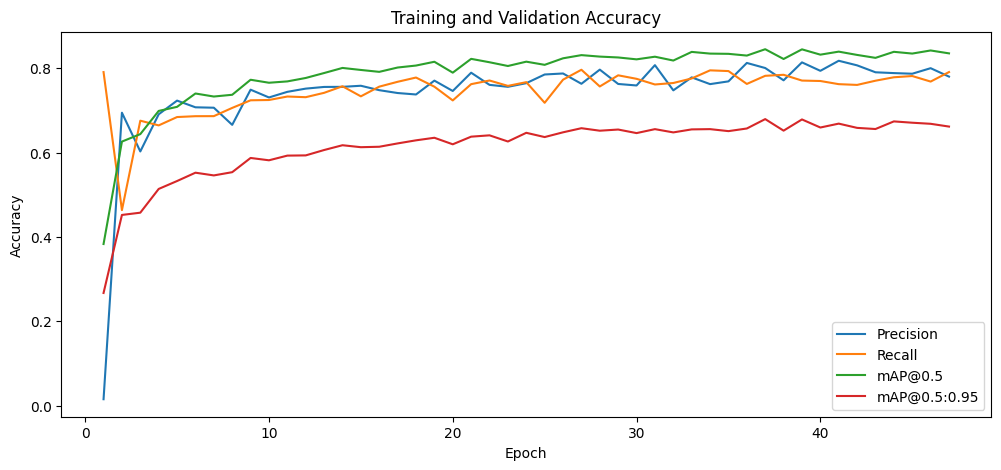

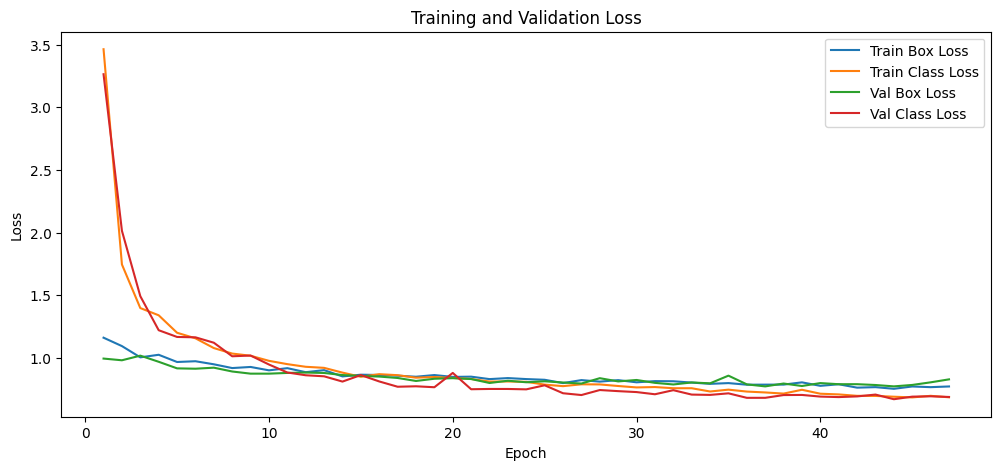

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp kết quả
results_df = pd.read_csv("runs/detect/train/results.csv")

# Tạo bảng Training và Validation Accuracy
accuracy_df = results_df[['epoch', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']]
accuracy_df.columns = ['Epoch', 'Precision', 'Recall', 'mAP@0.5', 'mAP@0.5:0.95']
print("Training and Validation Accuracy:")
print(accuracy_df)

# Tạo bảng Training và Validation Loss
loss_df = results_df[['epoch', 'train/box_loss', 'train/cls_loss', 'val/box_loss', 'val/cls_loss']]
loss_df.columns = ['Epoch', 'Train Box Loss', 'Train Class Loss', 'Val Box Loss', 'Val Class Loss']
print("\nTraining and Validation Loss:")
print(loss_df)

# Vẽ biểu đồ Training và Validation Accuracy
plt.figure(figsize=(12, 5))
plt.plot(results_df['epoch'], results_df['metrics/precision(B)'], label='Precision')
plt.plot(results_df['epoch'], results_df['metrics/recall(B)'], label='Recall')
plt.plot(results_df['epoch'], results_df['metrics/mAP50(B)'], label='mAP@0.5')
plt.plot(results_df['epoch'], results_df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Vẽ biểu đồ Training và Validation Loss
plt.figure(figsize=(12, 5))
plt.plot(results_df['epoch'], results_df['train/box_loss'], label='Train Box Loss')
plt.plot(results_df['epoch'], results_df['train/cls_loss'], label='Train Class Loss')
plt.plot(results_df['epoch'], results_df['val/box_loss'], label='Val Box Loss')
plt.plot(results_df['epoch'], results_df['val/cls_loss'], label='Val Class Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [10]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [11]:
download_file('/kaggle/working/runs', 'v11_6')

/kaggle/working/v11_6.zip